<a href="https://colab.research.google.com/github/marievera/Ejercicios_Python/blob/main/Miniproyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Miniproyecto 1**


# **1. Lectura y análisis exploratorio de datos**


**a.   Abrir Google Colab o Jupyter Notebook**








In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**b. Importe liberías Pandas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer


**c. Cargar base de datos de nombre ejemplo_data.csv**

In [10]:
df=pd.read_csv("/content/drive/MyDrive/Learning Machine/Modulo1/Miniproyecto1/ejemplo_data.csv")
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,n


**d. Identifique los tipos de variables que hay disponibles en la base de datos**

In [4]:
tipos_de_variables_df = df.dtypes

print("Tipos de variables en df:")
print(tipos_de_variables_df)



Tipos de variables en df:
ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo         object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      object
dtypes: int64(1), object(7)
memory usage: 512.0+ bytes


**e. Utilizando la función astype, transforme el atributo ID a entero y el atributo activo a binario**

In [11]:
from pandas.core.arrays import boolean

#Transformar atributo ID a entero

df['ID'] = df['ID'].astype(int)

# Primero transformar atributo Activo a Entero y luego a Binario
# supuesto: el valor de n es falso

df['Activo'] = df['Activo'].replace(['n'], '0')
df['Activo'] = df['Activo'].astype(int)

df['Activo'] = df['Activo'].astype(bool)



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 470.0+ bytes


In [14]:
df


,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,False
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,False


**f. Convierta el atributo unidades a entero y 2016 a flotante**

In [16]:
#Convertir unidades a entero
#supuesto: en la columna unidades la cadena no se asume como 0

df['Unidades'] = df['Unidades'].replace('No', '0')
df['Unidades'] = df['Unidades'].astype(int)

#Convertir 2016 a flotante

df['2016'] = df['2016'].astype(str).str.replace('[\$,]', '', regex=True)
df['2016'] = df['2016'].astype(float)

In [17]:
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,125000.0,$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,920000.0,"$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,50000.0,62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,350000.0,490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,15000.0,$12750.00,-15.00%,0,2-15-2014,False
5,651029,San Pablo,-15000.0,$ 12750.00,-15.00%,0,2-15-2014,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6 non-null      int64  
 1   Nombre       6 non-null      object 
 2   2016         6 non-null      float64
 3   2017         6 non-null      object 
 4   Crecimiento  6 non-null      object 
 5   Unidades     6 non-null      int64  
 6   fecha        6 non-null      object 
 7   Activo       6 non-null      bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 470.0+ bytes


# **2. Estadisticas descriptivas**

**a. Cree un diccionario con 20 datos que contengan al menos dos atributos continuos y una variable categórica (por ejemplo: nombre, nota, edad)**


In [47]:
import pandas as pd

Notas_alumnos = {
    'Nombres': ['Fabrizio Morocho', 'Alison Napurí', 'Oscar Reyes', 'Juan Castro', 'Pablo Ordenes', 'Maria Celis', 'Monica Vera', 'Jordi Suarez', 'Guido Esquivel', 'Carmen Lucia', 'Emily Quinn', 'Techi Zanabria', 'Jorge Bobadilla', 'Felipe Ordonez', 'Sara Vera', 'Maria Orbegozo', 'Asuncion Esquivel', 'Yolanda Reatequi', 'Benjamin Benites', 'Marie Caceres'],
    'Edad': [16, 15, 17, 16, 14, 15, 16, 15, 17, 15, 15, 16, 18, 17, 16, 17, 15, 15, 16, 15],
    'Nota': [7.0, 7.0, 7.0, 6.8, 5.0, 6.2, 3.9, 4.6, 7.0, 6.5, 5.4, 5.1, 3.5, 6.8, 6.8, 3.5, 4.1, 6.2, 5.0, 6.7]
}

Notas_alumnos


{'Nombres': ['Fabrizio Morocho',
  'Alison Napurí',
  'Oscar Reyes',
  'Juan Castro',
  'Pablo Ordenes',
  'Maria Celis',
  'Monica Vera',
  'Jordi Suarez',
  'Guido Esquivel',
  'Carmen Lucia',
  'Emily Quinn',
  'Techi Zanabria',
  'Jorge Bobadilla',
  'Felipe Ordonez',
  'Sara Vera',
  'Maria Orbegozo',
  'Asuncion Esquivel',
  'Yolanda Reatequi',
  'Benjamin Benites',
  'Marie Caceres'],
 'Edad': [16,
  15,
  17,
  16,
  14,
  15,
  16,
  15,
  17,
  15,
  15,
  16,
  18,
  17,
  16,
  17,
  15,
  15,
  16,
  15],
 'Nota': [7.0,
  7.0,
  7.0,
  6.8,
  5.0,
  6.2,
  3.9,
  4.6,
  7.0,
  6.5,
  5.4,
  5.1,
  3.5,
  6.8,
  6.8,
  3.5,
  4.1,
  6.2,
  5.0,
  6.7]}

**b. Transforme dicho diccionario en un dataframe de pandas**

In [49]:
df1 = pd.DataFrame(Notas_alumnos)
df1.index = range(1, len(df1) + 1)
df1

,Nombres,Edad,Nota
1,Fabrizio Morocho,16,7.0
2,Alison Napurí,15,7.0
3,Oscar Reyes,17,7.0
4,Juan Castro,16,6.8
5,Pablo Ordenes,14,5.0
6,Maria Celis,15,6.2
7,Monica Vera,16,3.9
8,Jordi Suarez,15,4.6
9,Guido Esquivel,17,7.0
10,Carmen Lucia,15,6.5


In [54]:
df1.describe()

,Edad,Nota
count,20.000000,20.000000
mean,15.800000,5.705000
std,1.005249,1.270091
min,14.000000,3.500000
25%,15.000000,4.900000
50%,16.000000,6.200000
75%,16.250000,6.800000
max,18.000000,7.000000


**c. Obtenga estadisticas descriptivas de tendencia central**

**Calcular media**

In [50]:
# Media de las notas
Notas =df1["Nota"]
media_nota = Notas.mean()
print("Notas de los alumnos: \n",  Notas)
print("Media de las Notas de los alumnos:", media_nota)

if media_nota > 6.0:
  print("La media de las notas de los alumnos es alta, lo que indica que la mayoria de los alumnos tienen alto rendimiento")
elif media_nota < 4.0:
  print("La media de las notas de los alumnos es relativamente baja, lo que indica que la mayoria de los alumnos tienen bajo rendiemiento")
else:
  print("La media de las notas de los alumnos esta enmarcada entre los alumnos con alto rendimiento y bajo rendimiento")


Notas de los alumnos: 
 1     7.0
2     7.0
3     7.0
4     6.8
5     5.0
6     6.2
7     3.9
8     4.6
9     7.0
10    6.5
11    5.4
12    5.1
13    3.5
14    6.8
15    6.8
16    3.5
17    4.1
18    6.2
19    5.0
20    6.7
Name: Nota, dtype: float64
Media de las Notas de los alumnos: 5.705
La media de las notas de los alumnos esta enmarcada entre los alumnos con alto rendimiento y bajo rendimiento


In [55]:
# Media de las edades

Edad =df1["Edad"]
media_edad = Edad.mean()
mediana_edad = Edad.median()
moda_edad = Edad.mode().iloc[0]

print("Edad de los alumnos:\n ",  Edad)
print("Media de las Edades de los alumnos:", media_edad)

if media_edad > 18:
  print("La media de las edades de los alumnos del 3ero medio indica que la mayoria de los alumnos es mayor de edad con relación a los otros alumnos de otros cursos de 3ero medio")
elif media_edad < 15:
  print("La media de las edades de los alumnos del 3ero medio indica que la mayoria de los alumnos es menor de edad con relación a los otros alumnos de otros cursos de 3ero medio")
else:
  print("La media de las edades de los alumnos del 3ero medio indica que la mayoria de los alumnos tienen edades que se enmarcan con otros alumnos de otros cursos de 3ero medio")

Edad de los alumnos:
  1     16
2     15
3     17
4     16
5     14
6     15
7     16
8     15
9     17
10    15
11    15
12    16
13    18
14    17
15    16
16    17
17    15
18    15
19    16
20    15
Name: Edad, dtype: int64
Media de las Edades de los alumnos: 15.8
La media de las edades de los alumnos del 3ero medio indica que la mayoria de los alumnos tienen edades que se enmarcan con otros alumnos de otros cursos de 3ero medio


**Calcular Mediana**

In [58]:
# Mediana de las Notas de los alumnos

Notas =df1["Nota"]
mediana_nota = Notas.median()
print("Notas de los alumnos:\n",  Notas)
print("Mediana de las Notas de los alumnos:", mediana_nota)

if mediana_nota > 6.0:
  print("La mediana de las notas de los alumnos es mayor que la promedio  de las notas, lo que indica que la mayoria de los alumnos son muy buenos estudiantes, pero la minoria de alumnos perjudican el promedio general de las notas ")
elif mediana_nota < 4.0:
  print("La mediana de las notas de los alumnos es relativamente baja, lo que indica que la mayoria de los alumnos son malos estudiantes")
else:
  print("La mediana de las notas de los alumnos esta cerca del promedio general de los buenos estudiantes de la institución educativa")

Notas de los alumnos:
 1     7.0
2     7.0
3     7.0
4     6.8
5     5.0
6     6.2
7     3.9
8     4.6
9     7.0
10    6.5
11    5.4
12    5.1
13    3.5
14    6.8
15    6.8
16    3.5
17    4.1
18    6.2
19    5.0
20    6.7
Name: Nota, dtype: float64
Mediana de las Notas de los alumnos: 6.2
La mediana de las notas de los alumnos es mayor que la media de las notas, lo que indica que la mayoria de los alumnos son muy buenos estudiantes, pero la minoria de alumnos perjudican el promedio general de las notas 


**Calcular Moda**

In [60]:
Notas =df1["Nota"]
moda_nota = Notas.mode().iloc[0]

print("Notas de los alumnos:\n ",  Notas)
print("Moda de Nota:", moda_nota)

if moda_nota > 6.0:
  print("La moda de las notas de los alumnos esta cerca de la nota maxima, lo que indica que la mayoria de los alumnos tienen excelentes calificaciones ")
elif moda_nota < 4.0:
  print("La moda de las notas de los alumnos es relativamente baja, lo que indica que la mayoria de los alumnos tienen bajas calificaciones")
else:
  print("La moda de las notas de los alumnos esta lejos del promedio")

Notas de los alumnos:
  1     7.0
2     7.0
3     7.0
4     6.8
5     5.0
6     6.2
7     3.9
8     4.6
9     7.0
10    6.5
11    5.4
12    5.1
13    3.5
14    6.8
15    6.8
16    3.5
17    4.1
18    6.2
19    5.0
20    6.7
Name: Nota, dtype: float64
Moda de Nota: 7.0
La moda de las notas de los alumnos esta cerca de la nota maxima, lo que indica que la mayoria de los alumnos tienen excelentes calificaciones 


**c. Obtenga estadísticas descriptivas de dispersión**

**Calcular Dispersión**

In [63]:
# Desviación estándar de las Notas de los alumnos

import pandas as pd

Notas = df1["Nota"]
media_nota = df1['Nota'].mean()
std_nota = df1['Nota'].std()

# Imprimir las notas de los alumnos
print("Notas de los alumnos:", df1['Nota'])

# Imprimir la media de las notas
print("Media de las Notas de los alumnos:", media_nota)

# Imprimir la desviación estándar de las notas
print("Desviación Estándar de Nota:", std_nota)

# Realizar una evaluación de la desviación estándar
if std_nota > 1:
    print("La desviación estándar de las notas de los alumnos indica que las calificaciones tienen una dispersión mayor a 1 con respecto a la media 5.7")
elif std_nota < 1:
    print("La desviación estándar de las notas de los alumnos indica que las calificaciones tienen una dispersión menor a 1 con respecto a la media 5.7")
else:
    print("La desviación estándar es igual a 1, lo que sugiere que las calificaciones tienen una dispersión moderada alrededor de la media.")



Notas de los alumnos: 1     7.0
2     7.0
3     7.0
4     6.8
5     5.0
6     6.2
7     3.9
8     4.6
9     7.0
10    6.5
11    5.4
12    5.1
13    3.5
14    6.8
15    6.8
16    3.5
17    4.1
18    6.2
19    5.0
20    6.7
Name: Nota, dtype: float64
Media de las Notas de los alumnos: 5.705
Desviación Estándar de Nota: 1.270091169541529
La desviación estándar de las notas de los alumnos indica que las calificaciones tienen una dispersión mayor a 1 con respecto a la media 5.7


In [66]:
# Varianza de las Notas y Edades de los alumnos
var_nota = df1['Nota'].var()
var_edad = df1['Edad'].var()

# Rango de las columnas de las notas y la edades de los alumnos
rango_nota = df1['Nota'].max() - df1['Nota'].min()
rango_edad = df1['Edad'].max() - df1['Edad'].min()

# Estadísticas descriptivas de dispersión

print("Varianza de Nota:", var_nota)
print("Varianza de Edad:", var_edad)

if var_nota > 1:
    print("La varianza de las notas es relativamente alta, lo que indica que las calificaciones están dispersas alrededor de su media.")
elif var_nota < 1:
    print("La varianza de las notas es relativamente baja, lo que sugiere que las calificaciones tienden a agruparse cerca de su media.")
else:
    print("La varianza de las notas es igual a 1, lo que indica una dispersión moderada de las calificaciones.")

print("Rango de Nota:", rango_nota)
print("Rango de Edad:", rango_edad)

if rango_nota > 2:
    print("El rango de las notas es relativamente amplio, lo que sugiere una variabilidad significativa en las calificaciones.")
elif rango_nota <= 2:
    print("El rango de las notas es relativamente estrecho, lo que indica que las calificaciones están concentradas en un rango más reducido.")
else:
    print("El rango de las notas es igual a 2, lo que indica una dispersión moderada de las calificaciones.")

if rango_edad > 2:
    print("El rango de las edades es relativamente amplio, lo que sugiere una variabilidad significativa en las edades de los alumnos.")
elif rango_edad <= 2:
    print("El rango de las edades es relativamente estrecho, lo que indica que las edades están concentradas en un rango más reducido.")
else:
    print("El rango de las edades es igual a 2, lo que indica una dispersión moderada de las edades.")


Varianza de Nota: 1.6131315789473686
Varianza de Edad: 1.010526315789474
La varianza de las notas es relativamente alta, lo que indica que las calificaciones están dispersas alrededor de su media.
Rango de Nota: 3.5
Rango de Edad: 4
El rango de las notas es relativamente amplio, lo que sugiere una variabilidad significativa en las calificaciones.
El rango de las edades es relativamente amplio, lo que sugiere una variabilidad significativa en las edades de los alumnos.


# **3. Transformación e imputación de datos**

**a. Importe librerías panda y sklearn**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer


**b. Cargar base de datos de nombre ejemplo_data2.csv**

In [20]:
df2=pd.read_csv("/content/drive/MyDrive/Learning Machine/Modulo1/Miniproyecto1/ejemplo_data2.csv")
df2.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [21]:
df2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [22]:
df2.rename(columns={'Regionname':'Region'}, inplace=True)

df2.rename(columns={'SellerG':'Vendedor'}, inplace=True)

df2.rename(columns={'Price':'Precio'}, inplace=True)

df2.rename(columns={'CouncilArea':'Area'}, inplace=True)

df2.head(5)

df2

,Suburb,Address,Rooms,Type,Precio,Method,Vendedor,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Area,Lattitude,Longtitude,Region,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


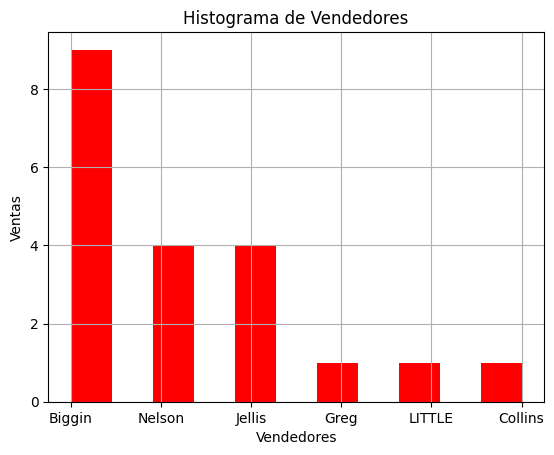

In [10]:
plt.hist(df2.head(20)['Vendedor'], bins=11, color='red', alpha=1)

plt.xlabel('Vendedores')
plt.ylabel('Ventas')
plt.title('Histograma de Vendedores')
plt.grid(True)

plt.show()


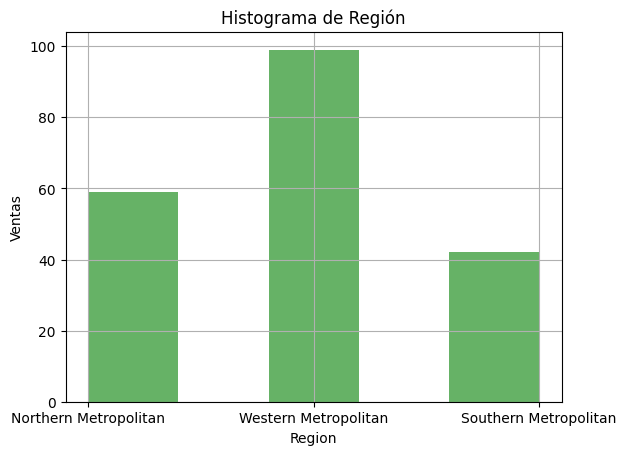

In [125]:
plt.hist(df2.head(200)['Region'], bins=5, color='green', alpha=0.6)

plt.xlabel('Region')
plt.ylabel('Ventas')
plt.title('Histograma de Región')
plt.grid(True)

plt.show()

**c. Para la variables numéricas, genere un diagnóstico de números perdidos. Luego impute los valores de acuerdo a la media y de acuerdo a otro criterio seleccionado por usted. Explore las opciones de imputación del método fillna() de pandas**

In [146]:
# Diagnóstico de numeros perdidos
numeros_perdidos = df2.isnull().sum()
print(numeros_perdidos)


Suburb              0
Address             0
Rooms               0
Type                0
Precio              0
Method              0
Vendedor            0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Area             1369
Lattitude           0
Longtitude          0
Region              0
Propertycount       0
dtype: int64


In [127]:
# Imputación de valores perdidos con la media
promedio_precios = df2['Precio'].mean()

df2.head(100)['Precio'].fillna(promedio_precios)


0     1480000.0
1     1035000.0
2     1465000.0
3      850000.0
4     1600000.0
        ...    
95    1370000.0
96    1000000.0
97    2575000.0
98    1322500.0
99    1562500.0
Name: Precio, Length: 100, dtype: float64

In [113]:
for row in df2.head(5).columns:
    print(row, df2.head(5)[row].isnull().sum)

Suburb <bound method NDFrame._add_numeric_operations.<locals>.sum of 0    False
1    False
2    False
3    False
4    False
Name: Suburb, dtype: bool>
Address <bound method NDFrame._add_numeric_operations.<locals>.sum of 0    False
1    False
2    False
3    False
4    False
Name: Address, dtype: bool>
Rooms <bound method NDFrame._add_numeric_operations.<locals>.sum of 0    False
1    False
2    False
3    False
4    False
Name: Rooms, dtype: bool>
Type <bound method NDFrame._add_numeric_operations.<locals>.sum of 0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool>
Precio <bound method NDFrame._add_numeric_operations.<locals>.sum of 0    False
1    False
2    False
3    False
4    False
Name: Precio, dtype: bool>
Method <bound method NDFrame._add_numeric_operations.<locals>.sum of 0    False
1    False
2    False
3    False
4    False
Name: Method, dtype: bool>
Vendedor <bound method NDFrame._add_numeric_operations.<locals>.sum of 0    False
1    False
2    

In [114]:
# Imputación de valores faltantes con cero
df2_cero = df2.fillna(0)
print(df2_cero)


              Suburb           Address  Rooms Type     Precio Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

       Vendedor        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...  

In [115]:
# Imputación de valores faltantes con el valor anterior
df2_anterior = df2.fillna(method='ffill')
print(df2_anterior)


              Suburb           Address  Rooms Type     Precio Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

       Vendedor        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...  

**d. Transforma las variables categóricas a numéricas, generando una variable dummy por cada categoria**

In [131]:
df2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Precio', 'Method', 'Vendedor',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Area', 'Lattitude',
       'Longtitude', 'Region', 'Propertycount'],
      dtype='object')

In [23]:
# Lista de columnas a convertir en variables dummy
columns_to_dummify = ['Rooms']

# Generar variables dummy
df_dummies = pd.get_dummies(df2, columns=columns_to_dummify)

# La variable df_dummies ahora contiene las columnas originales y las nuevas variables dummy


In [24]:
df_dummies

,Suburb,Address,Type,Precio,Method,Vendedor,Date,Distance,Postcode,Bedroom2,...,Propertycount,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_10
0,Abbotsford,85 Turner St,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,4019.0,0,1,0,0,0,0,0,0,0
1,Abbotsford,25 Bloomburg St,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,4019.0,0,1,0,0,0,0,0,0,0
2,Abbotsford,5 Charles St,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,4019.0,0,0,1,0,0,0,0,0,0
3,Abbotsford,40 Federation La,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,4019.0,0,0,1,0,0,0,0,0,0
4,Abbotsford,55a Park St,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,4019.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,...,7392.0,0,0,0,1,0,0,0,0,0
13576,Williamstown,77 Merrett Dr,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,...,6380.0,0,0,1,0,0,0,0,0,0
13577,Williamstown,83 Power St,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,...,6380.0,0,0,1,0,0,0,0,0,0
13578,Williamstown,96 Verdon St,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,...,6380.0,0,0,0,1,0,0,0,0,0


In [25]:
df2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Precio', 'Method', 'Vendedor',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Area', 'Lattitude',
       'Longtitude', 'Region', 'Propertycount'],
      dtype='object')

In [26]:
print(df2.dtypes)

Suburb            object
Address           object
Rooms              int64
Type              object
Precio           float64
Method            object
Vendedor          object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Area              object
Lattitude        float64
Longtitude       float64
Region            object
Propertycount    float64
dtype: object


In [27]:
print(df2.nunique())

Suburb             314
Address          13378
Rooms                9
Type                 3
Precio            2204
Method               5
Vendedor           268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
Area                33
Lattitude         6503
Longtitude        7063
Region               8
Propertycount      311
dtype: int64


In [18]:
label_encoder = LabelEncoder()

df2['Rooms'] = label_encoder.fit_transform(df2['Rooms'])

In [19]:
df2

,Suburb,Address,Rooms,Type,Precio,Method,Vendedor,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Area,Lattitude,Longtitude,Region,Propertycount
0,Abbotsford,85 Turner St,1,h,1480000.0,1,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,1,h,1035000.0,1,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,2,h,1465000.0,3,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,2,h,850000.0,0,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,3,h,1600000.0,4,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,3,h,1245000.0,1,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,2,h,1031000.0,3,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,2,h,1170000.0,1,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,3,h,2500000.0,0,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [89]:
label_encoder.classes_

array(['PI', 'S', 'SA', 'SP', 'VB'], dtype=object)

In [90]:
df2.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Precio           float64
Method             int64
Vendedor          object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Area              object
Lattitude        float64
Longtitude       float64
Region            object
Propertycount    float64
dtype: object

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Precio         13580 non-null  float64
 5   Method         13580 non-null  int64  
 6   Vendedor       13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  Area           12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# **4. Visualizacion de datos**

**a. Importe librerias searborn, matpotlip y numpy**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer


**b. Crear base de datos. Utilizando numpy.random.multivariate_normal**

In [ ]:
mean = (4, 4)
cov = [[1, 0.5], [0.5,1]]
data = np.random.multivariate_normal(mean, cov, 100)
print(data[:10])

[[4.58301044 3.36085243]
 [2.24296233 2.30216078]
 [4.78134702 3.4692334 ]
 [4.02521414 3.31931623]
 [4.59493517 4.22892603]
 [2.53507661 2.98442651]
 [2.3311721  3.37878846]
 [5.6652526  4.96336193]
 [3.68014533 4.07729341]
 [3.18249284 2.62748017]]


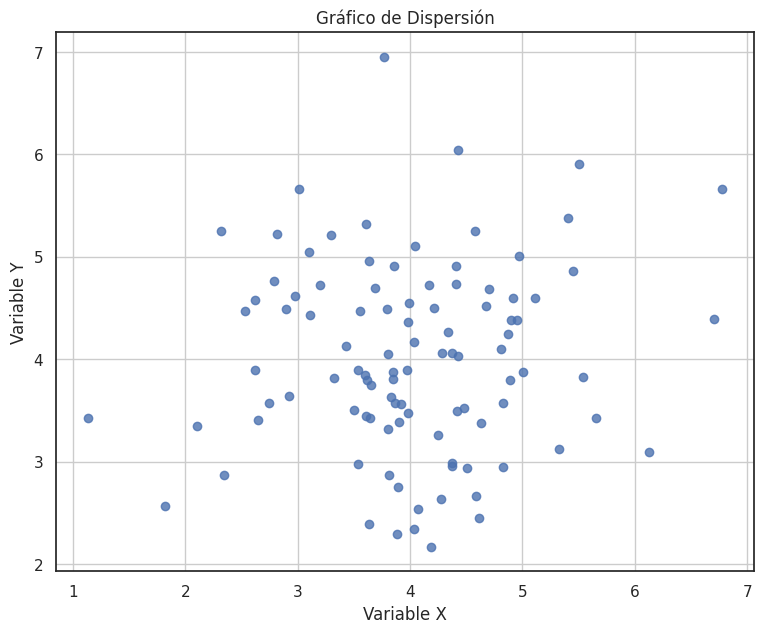

In [ ]:
# Visualización de Gráfico de Dispersión

plt.figure (figsize=(9, 7))
plt.scatter(data[:, 0], data[:, 1], alpha=0.8)
plt.xlabel ('Variable X')
plt.ylabel ('Variable Y')
plt.title ('Gráfico de Dispersión')
plt.grid(True)
plt.show()

<ipython-input-285-3ef7cb7be655>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap='Blues', shade=True, cbar=True)


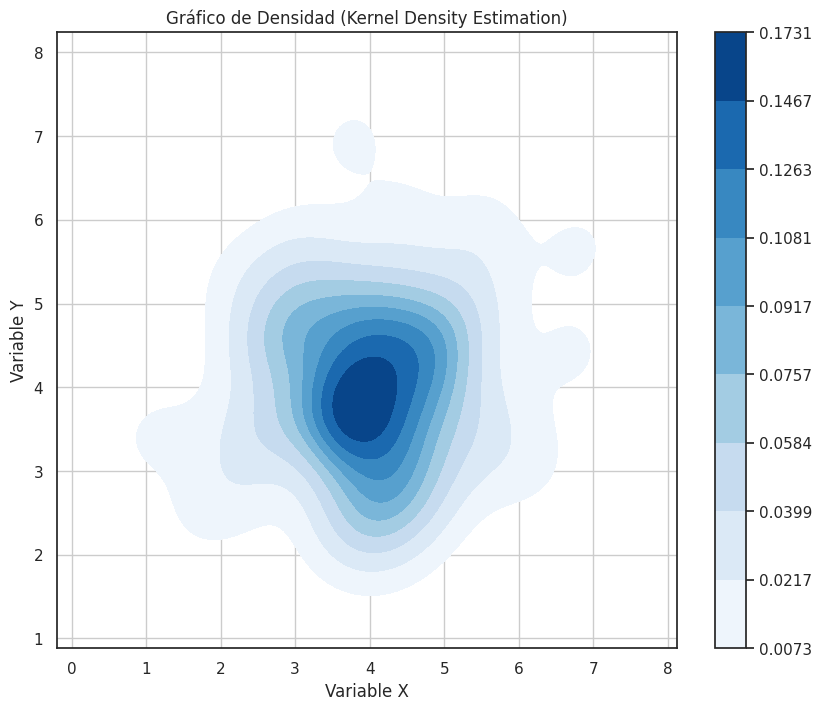

In [ ]:
# Visualización de Gráfico de Densidad

sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap='Blues', shade=True, cbar=True)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Gráfico de Densidad (Kernel Density Estimation)')
plt.grid(True)
plt.show()

**c. Experimentacion**

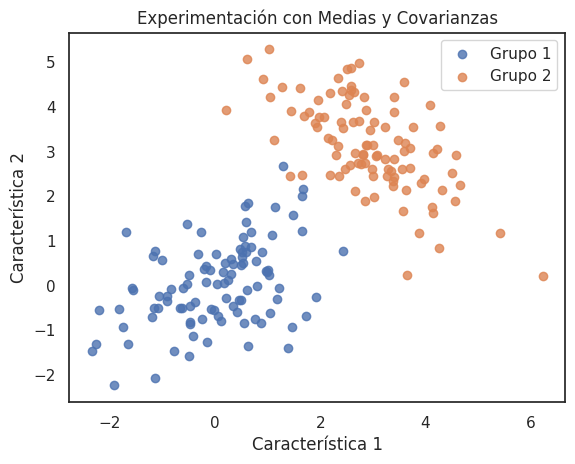

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]

mean2 = [3, 3]
cov2 = [[1, -0.5], [-0.5, 1]]

data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Visualización de los datos generados

plt.scatter(data1[:, 0], data1[:, 1], label='Grupo 1', alpha=0.8)
plt.scatter(data2[:, 0], data2[:, 1], label='Grupo 2', alpha=0.8)
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Experimentación con Medias y Covarianzas')
plt.show()

**d. Generar base de datos que distribuya normal bivariada**

In [ ]:
import numpy as np
import pandas as pd

# Definir medias y matriz de covarianza

mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Generar datos bivariados

data = np.random.multivariate_normal(mean, cov, 500)

# Crear un DataFrame de Pandas

df3 = pd.DataFrame(data, columns=['Variable1', 'Variable2'])

# Visualizar las primeras filas del DataFrame
print(df3.head())

   Variable1  Variable2
0   0.771598   1.164446
1   0.923445  -0.127568
2  -1.384032   0.377626
3   0.159298  -0.617473
4  -0.411359   0.301689


**e. Generar un grafico de dispersion utilizando seaborn**

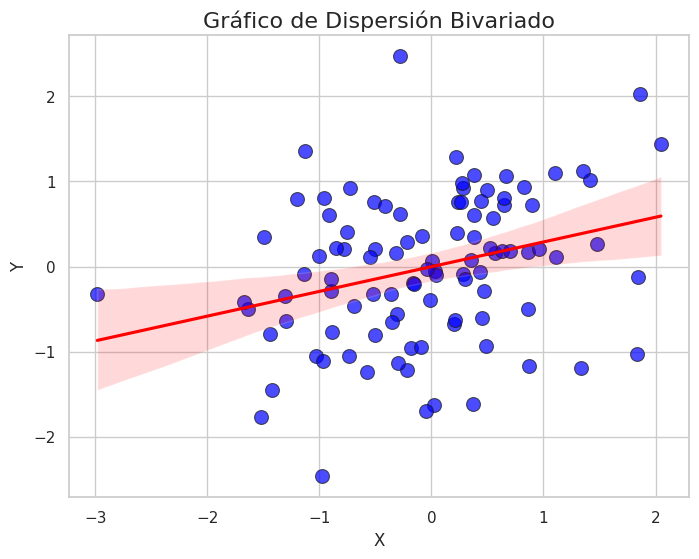

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

size = 100
data = np.random.multivariate_normal(mean, cov, size)
df3 = pd.DataFrame(data, columns=['X', 'Y'])

sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=df3, x='X', y='Y', s=100, color='blue', marker='o', alpha=0.7, edgecolor='k')
plt.title("Gráfico de Dispersión Bivariado", fontsize=16)
plt.xlabel("Eje X", fontsize=12)
plt.ylabel("Eje Y", fontsize=12)
sns.regplot(data=df3, x='X', y='Y', scatter=False, color='red')

plt.show()

**f. Genera un boxplot para cada una de las dimensiones de la base de datos creada. Explore los argumentos de los metodos  utilizados**

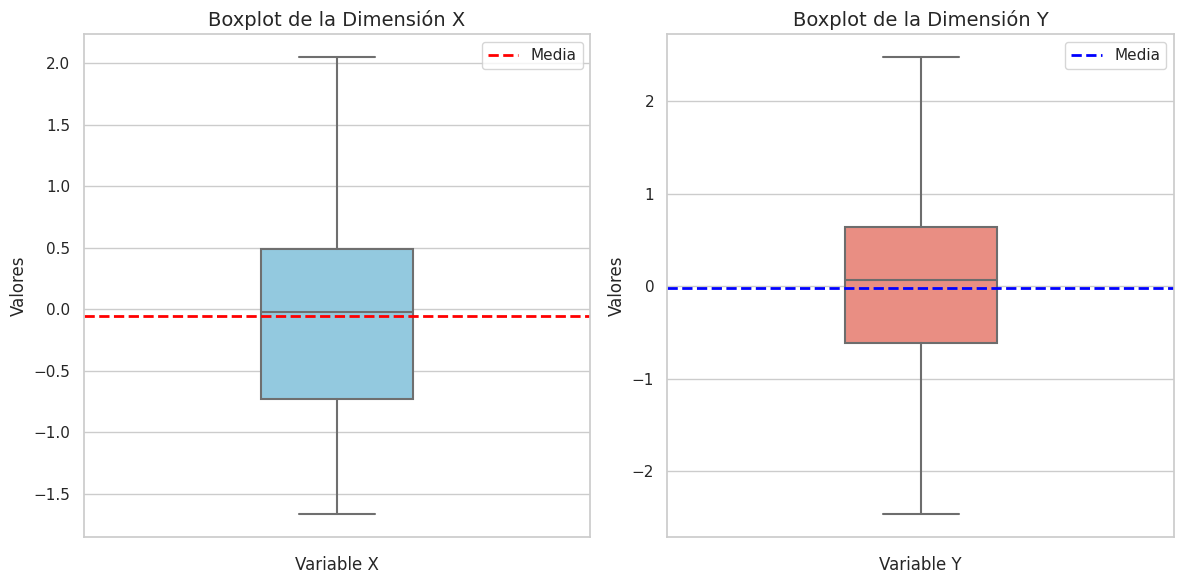

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df3 = pd.DataFrame(data, columns=['X', 'Y'])
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Boxplot para la dimensión X
plt.subplot(1, 2, 1)
sns.boxplot(data=df3, y='X', color='skyblue', width=0.3, showfliers=False)
plt.title("Boxplot de la Dimensión X", fontsize=14)
plt.xlabel("Variable X", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.axhline(np.mean(df3['X']), color='red', linestyle='--', label='Media', linewidth=2)
plt.legend()

# Boxplot para la dimensión Y
plt.subplot(1, 2, 2)
sns.boxplot(data=df3, y='Y', color='salmon', width=0.3, showfliers=False)
plt.title("Boxplot de la Dimensión Y", fontsize=14)
plt.xlabel("Variable Y", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.axhline(np.mean(df3['Y']), color='blue', linestyle='--', label='Media', linewidth=2)
plt.legend()

# Gráficos
plt.tight_layout()
plt.show()
